# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [6]:
print(df_hh_income.head())
print(df_pct_poverty.head())
print(df_pct_completed_hs.head())
print(df_share_race_city.head())

  Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575
3              AL     Addison town         37083
4              AL       Akron town         21667
  Geographic Area             City poverty_rate
0              AL       Abanda CDP         78.8
1              AL   Abbeville city         29.1
2              AL  Adamsville city         25.5
3              AL     Addison town         30.7
4              AL       Akron town           42
  Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6
  Geographic area             City share_white share_black  \
0              AL   

In [7]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


# Preliminary Data Exploration

In [8]:
data_list = [df_hh_income, df_pct_poverty, df_pct_completed_hs, df_share_race_city, df_fatalities]   
for data in data_list:
    print(f'The shape of the dataframe is {data.shape}')   
    print(f'There are {data.shape[0]} rows and {data.shape[1]} columns') 
    print(data.columns)
    print(f'There are NaN : {data.isna().values.any()}')
    print(f'There are Duplicates:{data.duplicated().values.any()}')
    print('\n\n')

The shape of the dataframe is (29322, 3)
There are 29322 rows and 3 columns
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
There are NaN : True
There are Duplicates:False



The shape of the dataframe is (29329, 3)
There are 29329 rows and 3 columns
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
There are NaN : False
There are Duplicates:False



The shape of the dataframe is (29329, 3)
There are 29329 rows and 3 columns
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
There are NaN : False
There are Duplicates:False



The shape of the dataframe is (29268, 7)
There are 29268 rows and 7 columns
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
There are NaN : False
There are Duplicates:False



The shape of the dataframe is (2535, 14)
There are 2535 rows and 14 columns
Index(['id', 'name', 'date', 'manner_of_death', 'ar

## Data Cleaning - Check for Missing Values and Duplicates



In [9]:
df_hh_income['Median Income'].isna().value_counts()
filtered = df_hh_income[(df_hh_income['Geographic Area'] == 'WY') & (df_hh_income['Median Income'].notna())]
average_income = filtered['Median Income'].values
li = np.array(average_income, dtype=int)
income = round(np.mean(li))
df_hh_income_copy = df_hh_income.copy()
df_hh_income_copy['Median Income'] = df_hh_income_copy['Median Income'].replace(np.nan, str(income))
df_hh_income_copy['Median Income'].isna().values.any()
df_hh_income_copy

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,60875
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [10]:
df_fatalities
# print(df_fatalities.state.isna().values.any())          #armed race flee age
# 

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


# The Poverty Rate in each US State



C:\Users\jayes\AppData\Local\Temp\ipykernel_8752\506420337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)


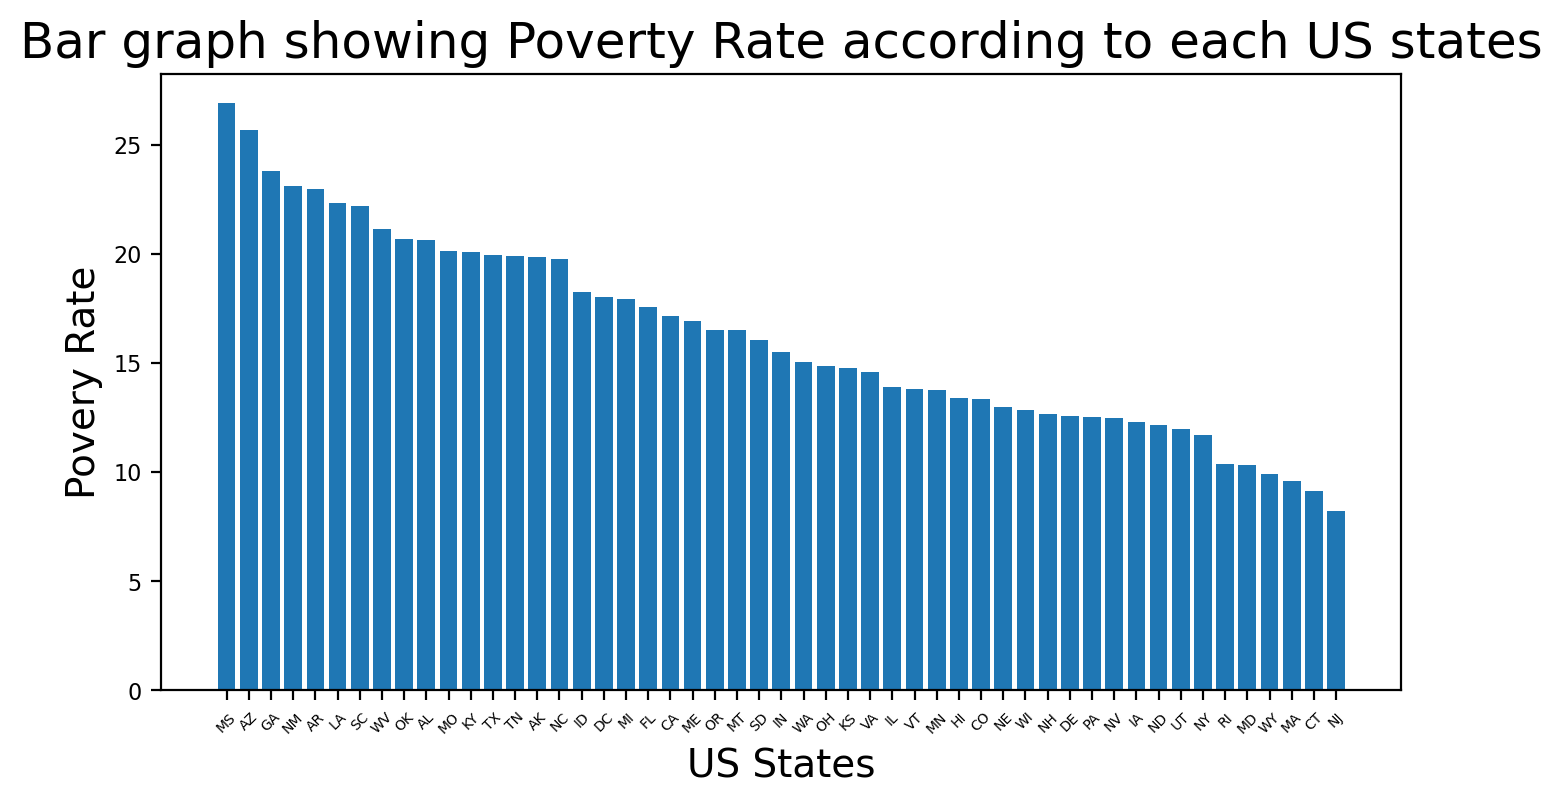

In [11]:
df_pct_poverty = df_pct_poverty[df_pct_poverty.poverty_rate != '-']
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
poverty_states = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate': pd.Series.mean}).reset_index()
poverty_states.sort_values('poverty_rate', ascending=False, inplace=True)

plt.figure(figsize=(8,4), dpi=200)
plt.title('Bar graph showing Poverty Rate according to each US states', fontsize=18)
plt.xlabel('US States', fontsize=14)
plt.ylabel('Povery Rate', fontsize=14)
plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=8)
plt.bar(poverty_states['Geographic Area'], height=poverty_states['poverty_rate'])
plt.show()


In [12]:
maximum = poverty_states.loc[poverty_states.poverty_rate.idxmax()]['Geographic Area']
minimum = poverty_states.loc[poverty_states.poverty_rate.idxmin()]['Geographic Area']
print(f'From the above graph it is seen that {maximum}(Missippi) has the maximum poverty rate')
print(f'From the above graph it is seen that {minimum}(New Jersey) has the minimum poverty rate')

From the above graph it is seen that MS(Missippi) has the maximum poverty rate
From the above graph it is seen that NJ(New Jersey) has the minimum poverty rate


# The High School Graduation Rate by US State


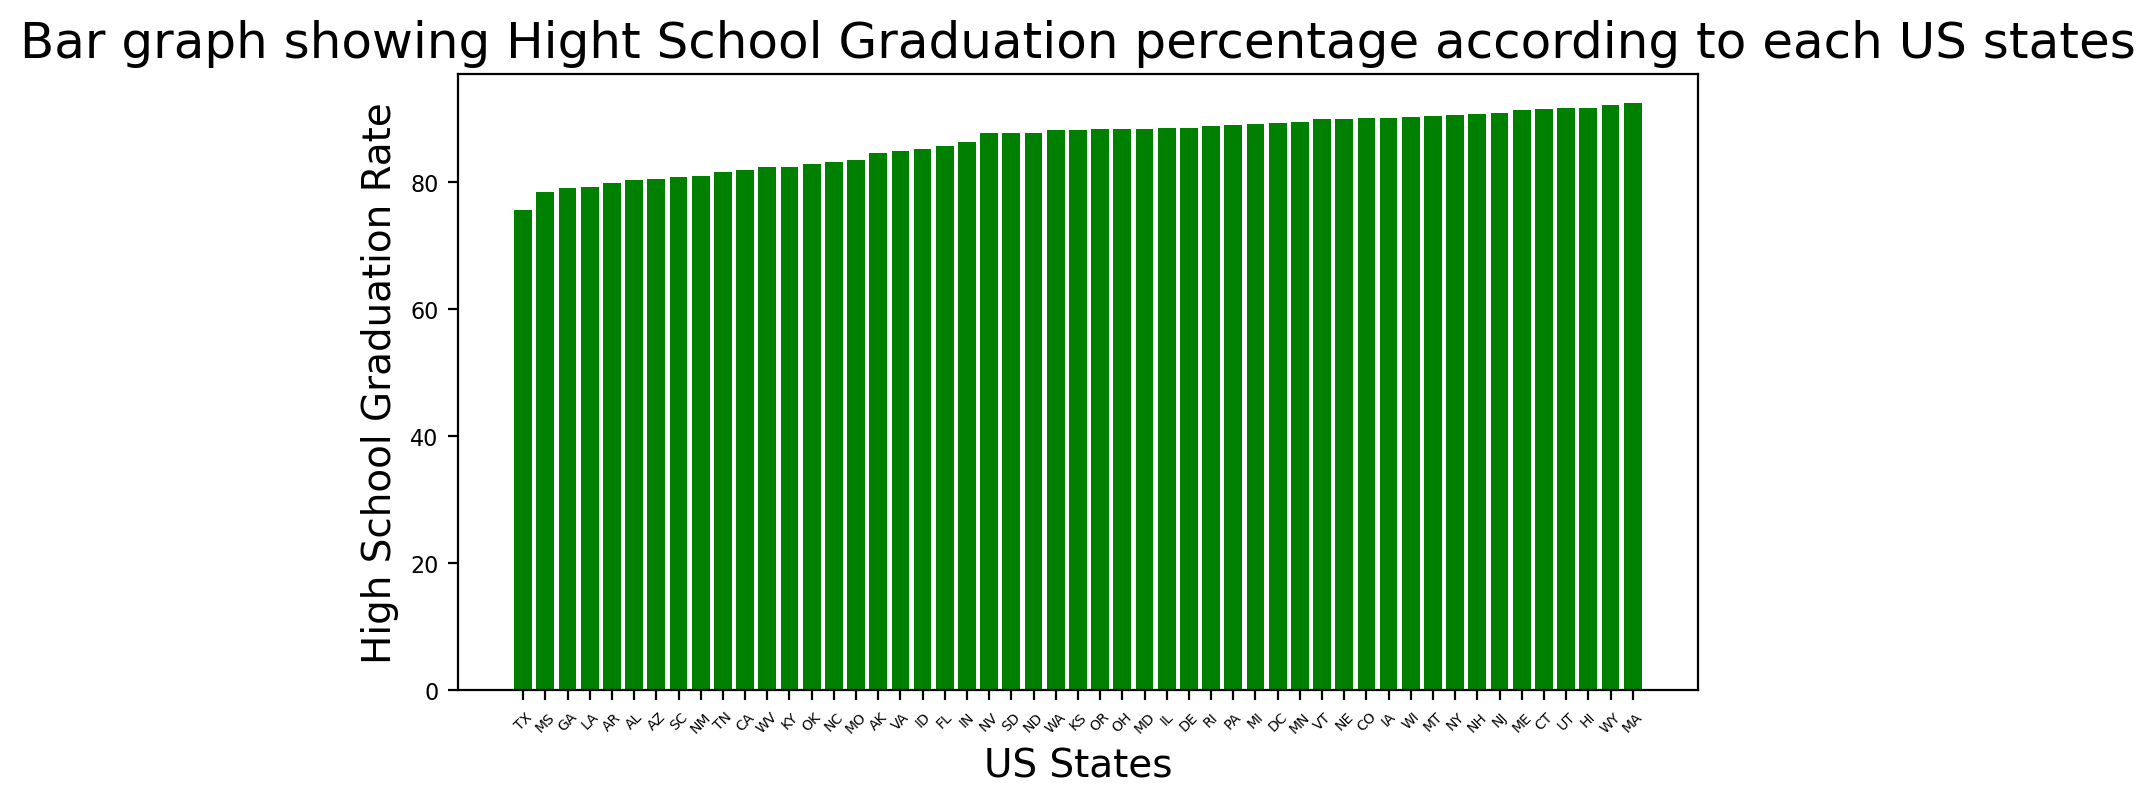

In [13]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs != '-']
high_school_df = df_pct_completed_hs.copy()
high_school_df.percent_completed_hs = pd.to_numeric(high_school_df.percent_completed_hs)
high_school = high_school_df.groupby('Geographic Area').agg({'percent_completed_hs': pd.Series.mean}).reset_index()
high_school.sort_values('percent_completed_hs', ascending=True, inplace=True)
df_pct_completed_hs

plt.figure(figsize=(8,4), dpi=200)
plt.title('Bar graph showing Hight School Graduation percentage according to each US states', fontsize=18)
plt.xlabel('US States', fontsize=14)
plt.ylabel('High School Graduation Rate', fontsize=14)
plt.xticks(fontsize=5, rotation=45)
plt.yticks(fontsize=8)
plt.bar(high_school['Geographic Area'], height=high_school['percent_completed_hs'], color='green')
plt.show()


In [14]:
print('From above graph it is seen that TX(Texas) is having the lowest high school graduation percentage \nand MA(Massachusetts) is having the highest graduation percentage.')

From above graph it is seen that TX(Texas) is having the lowest high school graduation percentage 
and MA(Massachusetts) is having the highest graduation percentage.


# Visualising the Relationship between Poverty Rates and High School Graduation Rates



In [15]:
merge_df = poverty_states.merge(high_school, how='inner')
merge_df.sort_values('poverty_rate', ascending=False, inplace=True)
merge_df.head()

,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.67,80.47
2,GA,23.78,79.01
3,NM,23.08,80.98
4,AR,22.96,79.95


C:\Users\jayes\AppData\Local\Temp\ipykernel_8752\344104797.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=10)


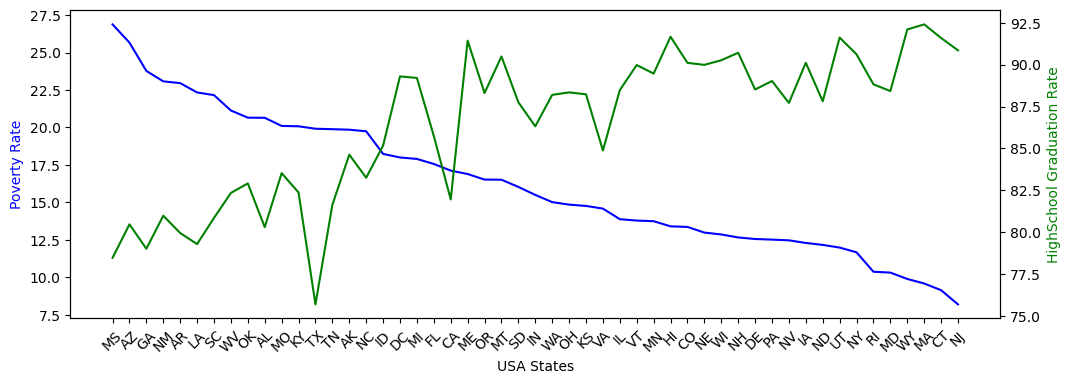

As seen from the above graph there is inverse relationship between Poverty Rate and HighSchool graduation rate
i.e Lower the poverty rate, higher number of students complete their high school education.


In [16]:
plt.figure(figsize=(12,4))
ax1 = plt.gca()
ax2 = plt.twinx()

ax1.plot(merge_df['Geographic Area'], merge_df['poverty_rate'], color='blue')
ax2.plot(merge_df['Geographic Area'], merge_df['percent_completed_hs'], color='green')

ax1.set_xlabel('USA States')
ax1.set_ylabel('Poverty Rate', color='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=10)
ax2.set_ylabel('HighSchool Graduation Rate', color='green')
plt.show()
print('As seen from the above graph there is inverse relationship between Poverty Rate and HighSchool graduation rate\ni.e Lower the poverty rate, higher number of students complete their high school education.')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Figure size 1600x800 with 0 Axes>

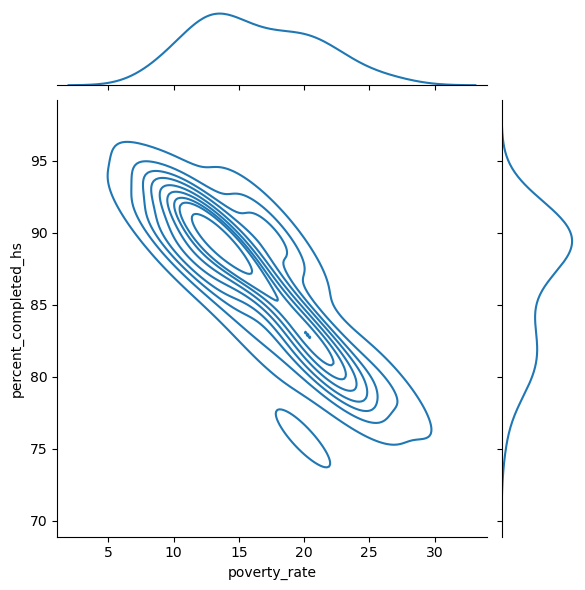

In [17]:
plt.figure(figsize=(8,4), dpi=200)
sns.jointplot(data=merge_df, x='poverty_rate', y='percent_completed_hs', kind='kde')
plt.show() 

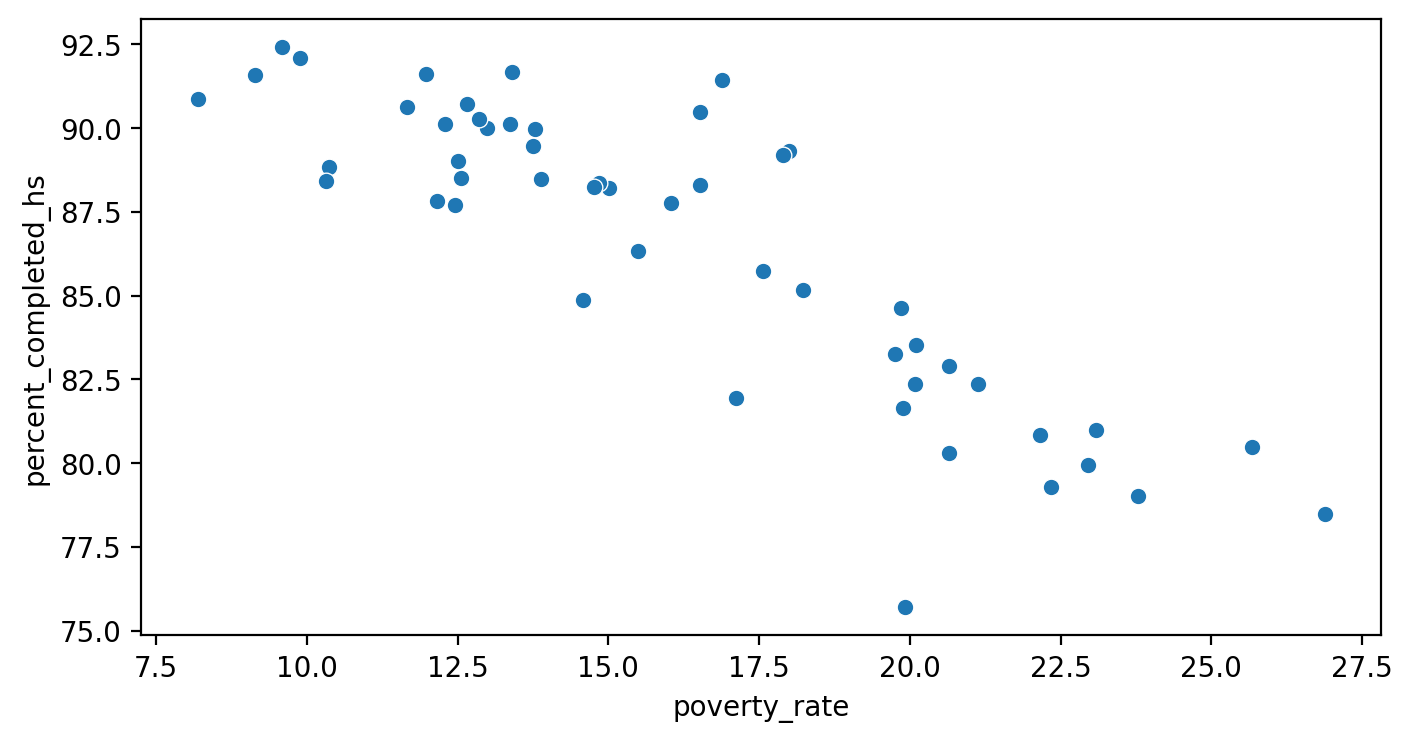

In [18]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=merge_df, x="poverty_rate", y="percent_completed_hs")
# sns.jointplot(data=merge_df, x='poverty_rate', y='percent_completed_hs', kind="reg")
plt.show() 

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<Figure size 1600x800 with 0 Axes>

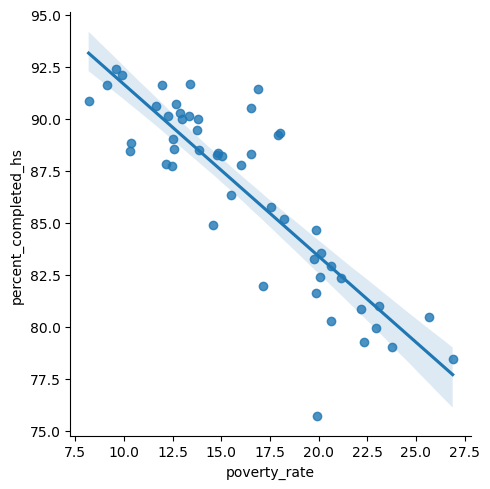

In [19]:
plt.figure(figsize=(8,4), dpi=200)
sns.lmplot(data=merge_df, x="poverty_rate", y="percent_completed_hs")
plt.show() 

# A Bar Chart with Subsections Showing the Racial Makeup of Each US State


In [20]:
columns_convert = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
df_share_race_city[columns_convert] = df_share_race_city[columns_convert].apply(pd.to_numeric, errors='coerce')
state_race = df_share_race_city.groupby('Geographic area').agg({'share_white': pd.Series.mean, 'share_black':pd.Series.mean, 'share_native_american': pd.Series.mean, 'share_asian': pd.Series.mean, 'share_hispanic': pd.Series.mean}).reset_index()
state_race.head()
 

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65


In [21]:
races = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
bar = px.bar(state_race, x='Geographic area',y=races, title='Percentage share of races', barmode='stack')
bar.show()

# A Donut Chart showing People Killed by Race


In [22]:
death_race = df_fatalities.copy()
death_race.race = death_race.race.replace({'W':'White','B':'Black','H':'Hispanic','N':'Native American','O':'Others','A':'Asian'})
death_race.race.dropna(inplace=True)
death_by_cops = death_race.race.value_counts()
death_by_cops


White              1201
Black               618
Hispanic            423
Asian                39
Native American      31
Others               28
Name: race, dtype: int64

In [23]:
donut = px.pie(names=death_by_cops.index, values=death_by_cops.values, title='People killed by race in USA', hole=0.3)
donut.update_traces(textinfo='percent+label')
donut.show()

# A Chart Comparing the Total Number of Deaths of Men and Women


In [24]:
male_female = df_fatalities.gender.value_counts()
male_female

M    2428
F     107
Name: gender, dtype: int64

In [25]:
male_female_bar = px.bar(male_female, male_female.index, male_female.values, color=male_female.index, title='Bar chart showing Deaths of Men V/S Women', labels={'index':'Sex', 'y':'Count'}, height=400, width=800)
male_female_bar.show()

# A Box Plot Showing the Age and Manner of Death


In [26]:
male_df = df_fatalities.copy()
male_df.dropna(subset='age', inplace=True)
male_df = male_df[male_df.gender == 'M']
boxplot_male = px.box(male_df, x=male_df.manner_of_death, y=male_df.age, color=male_df.manner_of_death, title='Box plot showing male age and manner of death', labels={'manner_of_death':'Male manner of death'})
boxplot_male.show()

In [194]:
female_df = df_fatalities.copy()
female_df.dropna(subset='age', inplace=True)
female_df = female_df[female_df.gender == 'F']
boxplot_female = px.box(female_df, x=female_df.manner_of_death, y=female_df.age, color=female_df.manner_of_death, title='Box plot showing Female age and manner of death', labels={'manner_of_death':'Female manner of death'})
boxplot_female.show()

In [28]:
print('From the above 2 graphs it is seen that the median for male and female is the same for both manner of death.')
print('From the male chart it is seen that males of higher ages are more involved in deaths compared to females.')

From the above 2 graphs it is seen that the median for male and female is the same for both manner of death.
From the male chart it is seen that males of higher ages are more involved in deaths compared to females.


# Graphs showing what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 
 

In [29]:
un_armed_df = df_fatalities.copy()
un_armed_df.dropna(subset=['armed'], inplace=True)
armed_df = un_armed_df[un_armed_df.armed != 'unarmed']
percentage_armed = armed_df.armed.count()/un_armed_df.armed.count() * 100
print(f'The percentage of police killings who were armed is {round(percentage_armed,2)}%')

The percentage of police killings who were armed is 93.23%


In [30]:
weapons = un_armed_df.armed.value_counts()
weapons_bar = px.bar(y=weapons.index, x=weapons.values, orientation='h', color=weapons.index, labels={'y':'Weapons', 'x':'Number of weapons'})
weapons_bar.show()

In [31]:
# gun_nogundf = weapons[weapons.]
weapon = weapons.loc[['gun','unarmed']]
pie = px.pie(values=weapon.values, names=weapon.index,title='Unarmed civilians vs Guns carrying civilians')
pie.update_traces(textposition='inside', textinfo='percent+label')
pie.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [32]:
all_age = df_fatalities.copy()
all_age.dropna(subset='age', inplace=True)
under_25 = all_age.copy()
under_25 = under_25[under_25.age < 25]
print(f'The percentage of people killed under 25 years of age is {under_25.age.count()/all_age.age.count() * 100:.3f}%')

The percentage of people killed under 25 years of age is 18.308%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

From the below graph it is seen that from age 20 to 40 years the death rate is at the highest.


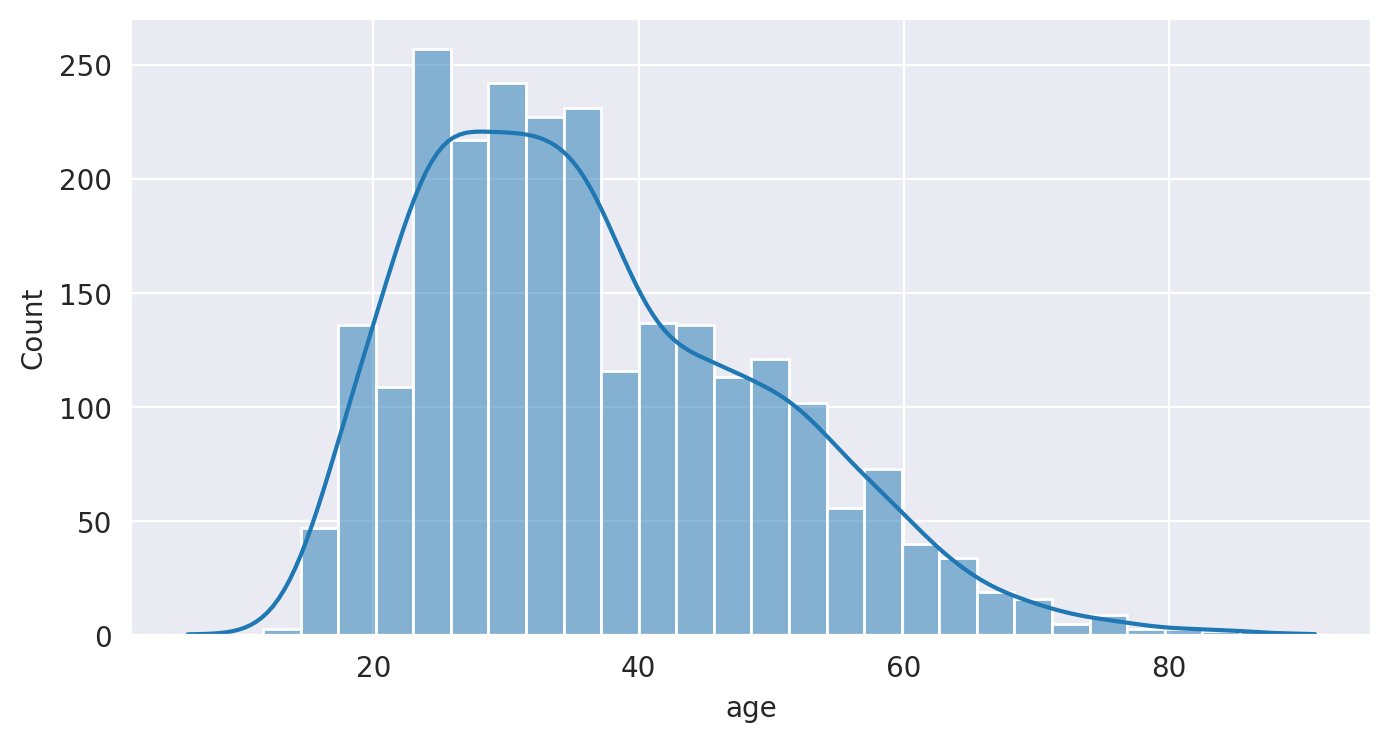

In [33]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style(style='darkgrid'):
    hist = sns.histplot(all_age, x='age', kde=True, bins=30)

print('From the below graph it is seen that from age 20 to 40 years the death rate is at the highest.')



Create a seperate KDE plot for each race. Is there a difference between the distributions? 

From the graph it is seen that white people commit crime between 30 an 55 years old peak.
From the graph it is seen that black people commit crime before 20 years and peak between 20 to 30 years old.
Hispanic people shows some density but others are minute to show any significant changes.


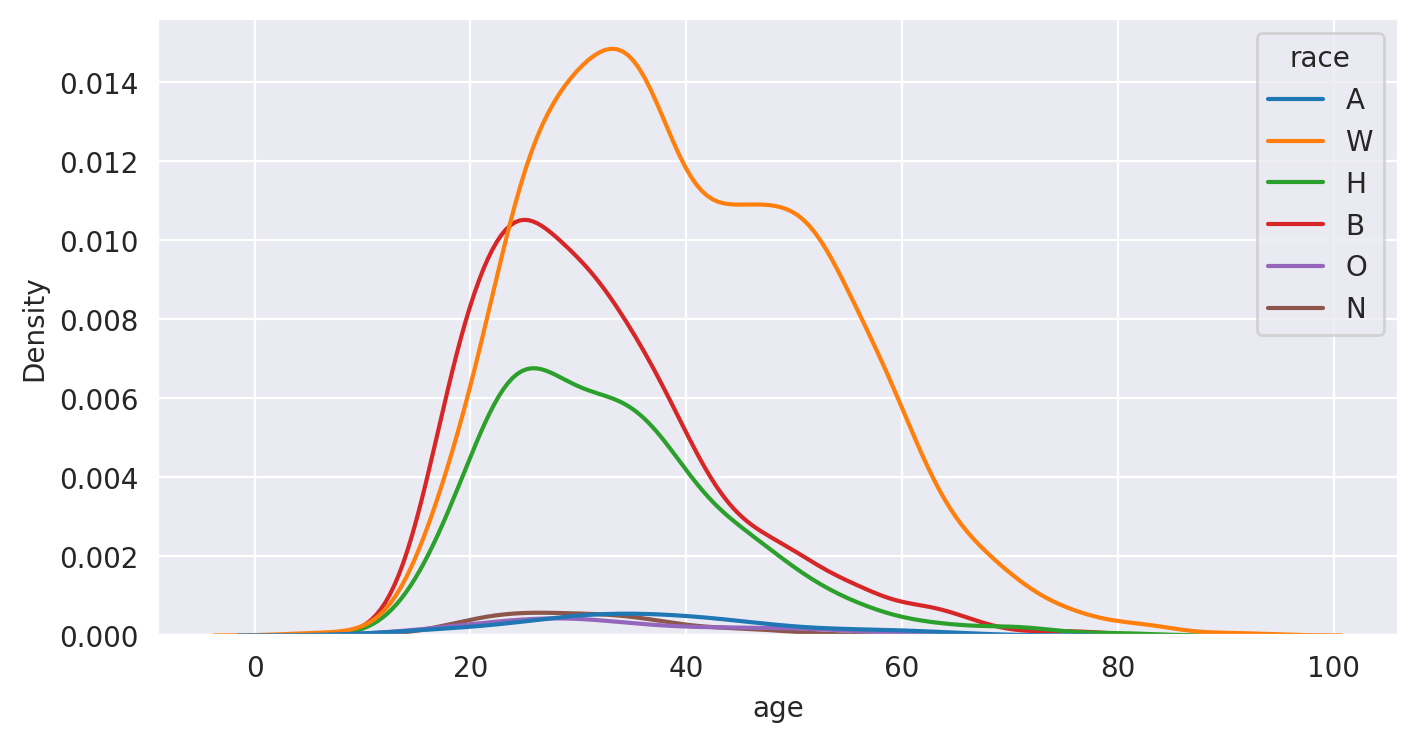

In [34]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style(style='darkgrid'):
    hist = sns.kdeplot(all_age, x='age', hue='race')
print('From the graph it is seen that white people commit crime between 30 an 55 years old peak.')
print('From the graph it is seen that black people commit crime before 20 years and peak between 20 to 30 years old.')
print('Hispanic people shows some density but others are minute to show any significant changes.')

# Race of People Killed


In [35]:
killed_bar = px.bar(x=death_by_cops.index, y=death_by_cops.values, title='Race of people Killed', color=death_by_cops.index)
killed_bar.update_xaxes(title_text='Races')
killed_bar.update_yaxes(title_text='Count')
killed_bar.show()

# Mental Illness and Police Killings


In [36]:
mental_illness = df_fatalities[df_fatalities.signs_of_mental_illness == True].manner_of_death.count()
mental_illness_percent = mental_illness/(df_fatalities.signs_of_mental_illness.count()) * 100
print(f'The percentage of mentally illed people killed are {mental_illness_percent:.2f}%')

The percentage of mentally illed people killed are 24.97%


In [37]:
pie_mental = df_fatalities.signs_of_mental_illness.value_counts()
mental_illness_chart = px.pie(values=pie_mental.values, names=pie_mental.index,title='Mental illness vs Normal mental state')
mental_illness_chart.update_traces(textposition='inside', textinfo='percent+label')
mental_illness_chart.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [38]:
df_fatalities.city.nunique()
city_df = df_fatalities.groupby(['city']).agg({'city':pd.Series.count}).rename(columns={'city':'Number of people killed'})
city_df.reset_index(inplace=True)
city_df.sort_values('Number of people killed', ascending=False, inplace=True)
city_df

,city,Number of people killed
732,Los Angeles,39
995,Phoenix,31
578,Houston,27
241,Chicago,25
687,Las Vegas,21
...,...,...
546,Healdton,1
543,Hawthorne,1
542,Hawaiian Gardens,1
541,Hattiesburg,1


In [39]:
city_graph = px.bar(city_df[:10], x='Number of people killed', y='city', orientation='h', title='Cities V/S People Killed', color='city')
city_graph.show()
print('From the above graph it looks like Los Angeles is the most dangerous city in USA')

From the above graph it looks like Los Angeles is the most dangerous city in USA


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [58]:
df_share_race_top10 = df_share_race_city[(df_share_race_city.City == 'Los Angeles city') | 
                                         (df_share_race_city.City == 'Chicago city') | 
                                         (df_share_race_city.City == 'Phoenix city')&(df_share_race_city['Geographic area'] == 'AZ') |
                                         (df_share_race_city.City == 'Houston city')&(df_share_race_city['Geographic area'] == 'TX') |
                                         (df_share_race_city.City == 'Las Vegas city')&(df_share_race_city['Geographic area'] == 'NV') |
                                         (df_share_race_city.City == 'San Antonio city')&(df_share_race_city['Geographic area'] == 'TX') |
                                         (df_share_race_city.City == 'Columbus city')&(df_share_race_city['Geographic area'] == 'OH') |
                                         (df_share_race_city.City == 'Miami city')&(df_share_race_city['Geographic area'] == 'FL') |
                                         (df_share_race_city.City == 'Austin city')&(df_share_race_city['Geographic area'] == 'TX') |
                                         (df_share_race_city.City == 'St. Louis city')&(df_share_race_city['Geographic area'] == 'MI')
                                        ]
df_share_race_top10.City = df_share_race_top10.City.str.split(' city').str[0]
df_top_ten = df_share_race_top10.rename(columns={'City':'city'})
df_top_ten

C:\Users\jayes\AppData\Local\Temp\ipykernel_8752\451977143.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Geographic area,city,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,AZ,Phoenix,65.90,6.50,2.20,3.20,40.80
2714,CA,Los Angeles,49.80,9.60,0.70,11.30,48.50
4633,FL,Miami,72.60,19.20,0.30,1.00,70.00
6278,IL,Chicago,45.00,32.90,0.50,5.50,28.90
12238,MI,St. Louis,67.70,29.10,0.60,0.20,5.70
15666,NV,Las Vegas,62.10,11.10,0.70,6.10,31.50
19379,OH,Columbus,61.50,28.00,0.30,4.10,5.60
24543,TX,Austin,68.30,8.10,0.90,6.30,35.10
25157,TX,Houston,50.50,23.70,0.70,6.00,43.80
25872,TX,San Antonio,72.60,6.90,0.90,2.40,63.20


In [84]:
top10_cities = city_df[:10]
city_10 = top10_cities.city.values
race_city_df = df_fatalities.groupby(['city', 'race']).agg({'race': pd.Series.count}).rename(columns={'race':'killed'}).reset_index()
race_city_df = race_city_df[race_city_df.city.isin(city_10)]
race_city_df

,city,race,killed
73,Austin,B,3
74,Austin,H,2
75,Austin,W,13
263,Chicago,B,21
264,Chicago,H,1
265,Chicago,W,2
319,Columbus,B,11
320,Columbus,O,1
321,Columbus,W,6
644,Houston,A,1


In [171]:
share_killed_df = pd.merge(df_top_ten, race_city_df, on='city', how='left')
total_killed_per_city = share_killed_df.groupby('city')['killed'].sum()
divisor = total_killed_per_city[share_killed_df.city].reset_index().killed
share_killed_df['percentage_killed_per_race'] = (share_killed_df.killed/divisor)*100
share_killed_df

,Geographic area,city,share_white,share_black,share_native_american,share_asian,share_hispanic,race,killed,percentage_killed_per_race
0,AZ,Phoenix,65.90,6.50,2.20,3.20,40.80,B,2,7.14
1,AZ,Phoenix,65.90,6.50,2.20,3.20,40.80,H,11,39.29
2,AZ,Phoenix,65.90,6.50,2.20,3.20,40.80,N,3,10.71
3,AZ,Phoenix,65.90,6.50,2.20,3.20,40.80,W,12,42.86
4,CA,Los Angeles,49.80,9.60,0.70,11.30,48.50,A,1,2.78
5,CA,Los Angeles,49.80,9.60,0.70,11.30,48.50,B,10,27.78
6,CA,Los Angeles,49.80,9.60,0.70,11.30,48.50,H,19,52.78
7,CA,Los Angeles,49.80,9.60,0.70,11.30,48.50,W,6,16.67
8,FL,Miami,72.60,19.20,0.30,1.00,70.00,B,8,47.06
9,FL,Miami,72.60,19.20,0.30,1.00,70.00,H,6,35.29


In [188]:
share_killed_pivot_df = share_killed_df.pivot(index='city', columns='race', values='percentage_killed_per_race').reset_index()
share_killed_pivot_df.rename(columns={'race':'Sr.No', 'A':'share_asian', 'B':'share_black', 'H':'share_hispanic', 'N':'share_native_american', 'O':'Others', 'W':'share_white'}, inplace=True)
share_killed_pivot_df = share_killed_pivot_df[['city', 'share_white', 'share_black', 'share_native_american', 'share_hispanic', 'Others']]
share_killed_pivot_df.fillna(0, inplace=True)
share_killed_pivot_df

race,city,share_white,share_black,share_native_american,share_hispanic,Others
0,Austin,72.22,16.67,0.00,11.11,0.00
1,Chicago,8.33,87.50,0.00,4.17,0.00
2,Columbus,33.33,61.11,0.00,0.00,5.56
3,Houston,11.54,57.69,3.85,23.08,0.00
4,Las Vegas,52.94,17.65,0.00,29.41,0.00
5,Los Angeles,16.67,27.78,0.00,52.78,0.00
6,Miami,17.65,47.06,0.00,35.29,0.00
7,Phoenix,42.86,7.14,10.71,39.29,0.00
8,San Antonio,16.67,16.67,0.00,66.67,0.00
9,St. Louis,21.43,78.57,0.00,0.00,0.00


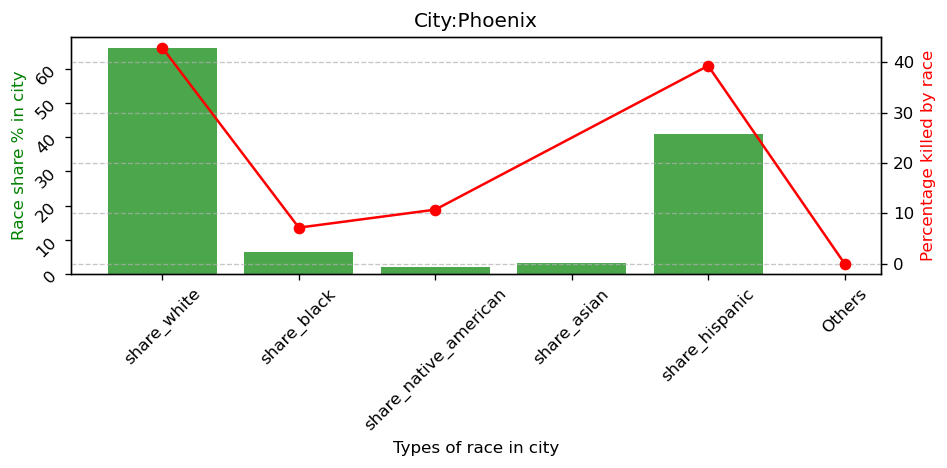

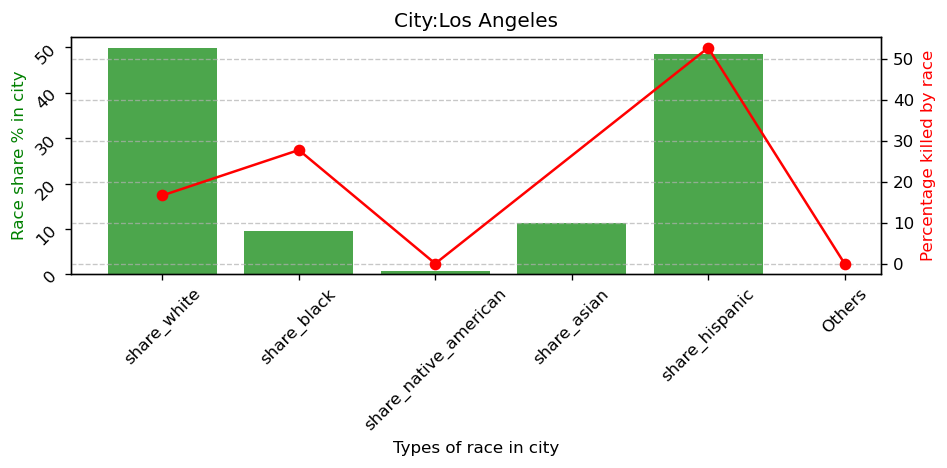

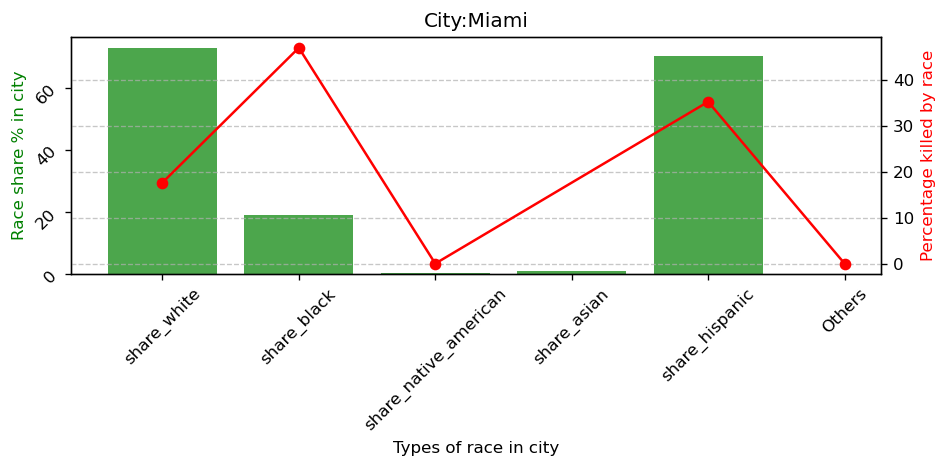

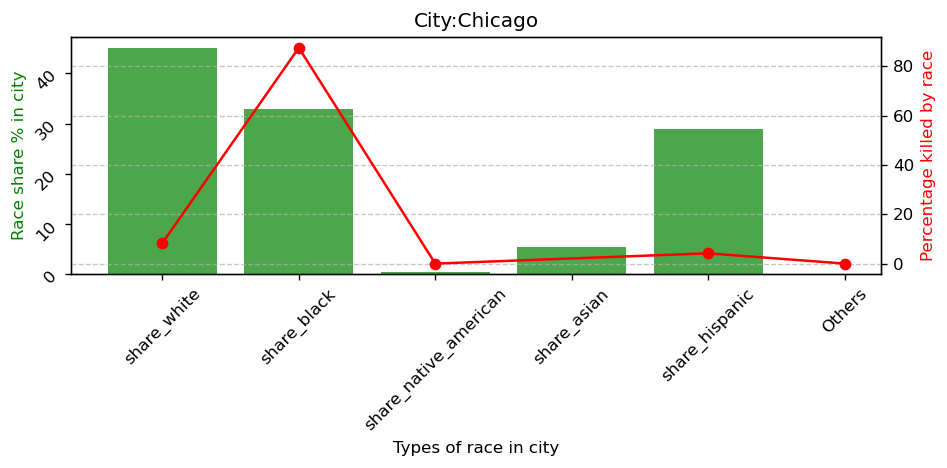

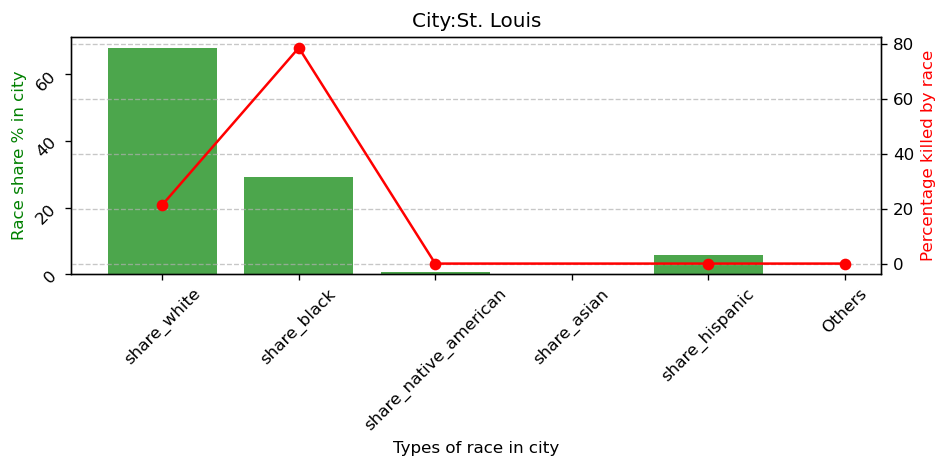

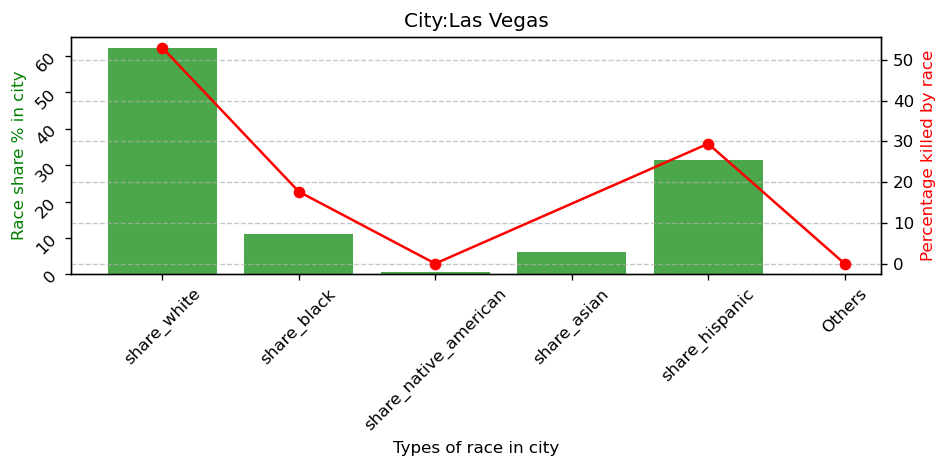

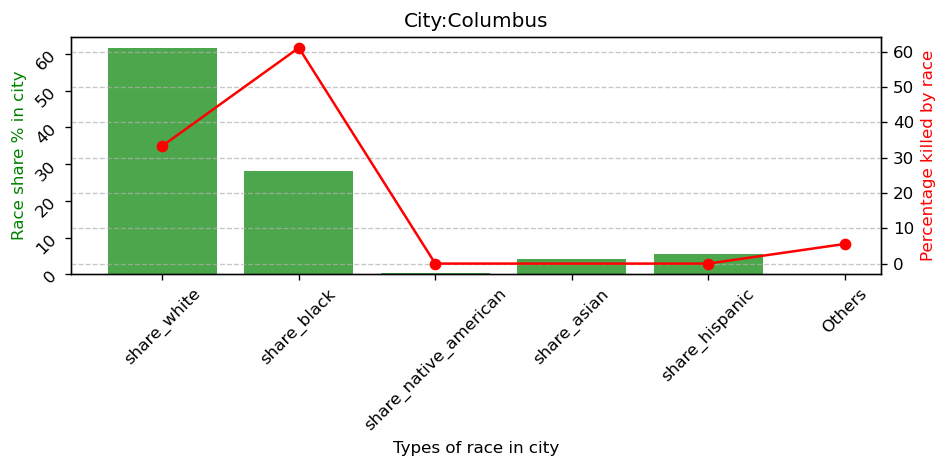

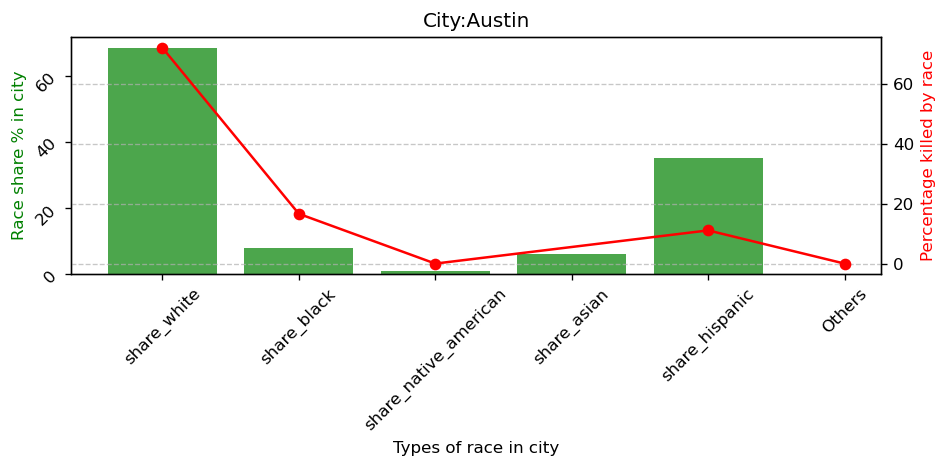

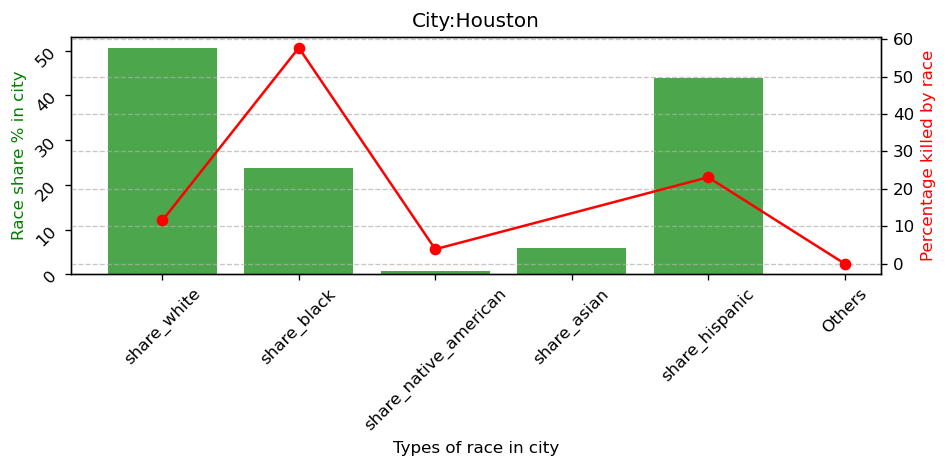

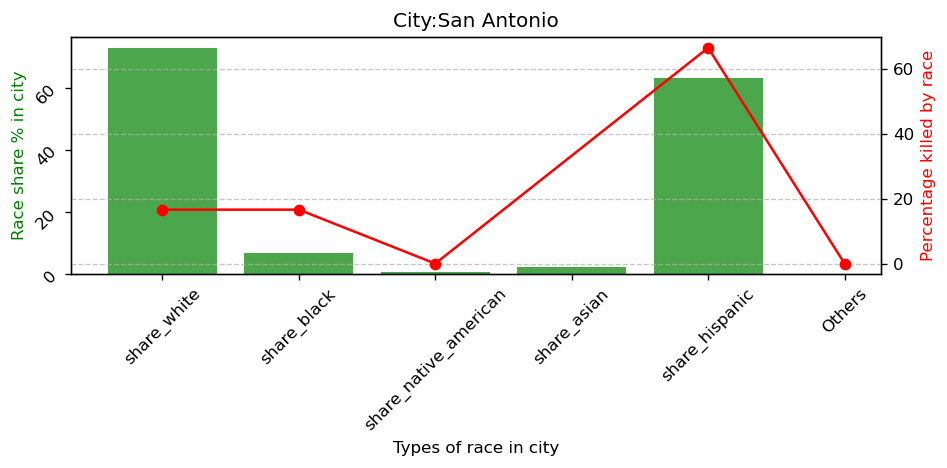

Phoenix has the most white and hispanic people killed
Los Angeles has white, black but hispanics are most killed
Miami black people are killed most followed by hispanics
 Houston, Chicago, St.Louis,Colombus have the black people killed the most
Las Vegas, Austio have white people killed the most
San Antonio has the most hispanics killed. 


In [193]:
for top_city in df_top_ten.city:
    plt.figure(figsize=(8,4), dpi=120)
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax1.bar(df_top_ten.columns[2:], df_top_ten[df_top_ten.city == top_city].values[0][2:], color='green', alpha=0.7)
    ax1.set_xlabel('Types of race in city')
    ax1.set_ylabel('Race share % in city', color='green')
    ax1.tick_params(labelcolor='black', rotation=45)
    ax2.plot(share_killed_pivot_df.columns[1:], share_killed_pivot_df[share_killed_pivot_df.city == top_city].values[0][1:], color='red', marker='o')
    ax2.set_ylabel('Percentage killed by race', color='red')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)

    plt.title(f'City:{top_city}')
    plt.tight_layout()
    plt.show() 
print('Phoenix has the most white and hispanic people killed\nLos Angeles has white, black but hispanics are most killed\nMiami black people are killed most followed by hispanics\n Houston, Chicago, St.Louis,Colombus have the black people killed the most\nLas Vegas, Austio have white people killed the most\nSan Antonio has the most hispanics killed. ')

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [43]:
states = df_fatalities.groupby('state').agg({'id': pd.Series.count}).reset_index().sort_values('id', ascending=False)
states.rename(columns={'id':'Killed by Police'}, inplace=True)
states

,state,Killed by Police
4,CA,424
43,TX,225
9,FL,154
3,AZ,118
35,OH,79
36,OK,78
5,CO,74
10,GA,70
27,NC,69
24,MO,64


In [44]:
choropleth = px.choropleth(states, locations='state', hover_name='state', color='Killed by Police', locationmode='USA-states', scope='usa', color_continuous_scale=px.colors.sequential.Plasma)
choropleth.show()
print('from the choropleth it is seen that California is the most dangerous state , followed by Texas, Florida , Arizona etc....')

from the choropleth it is seen that California is the most dangerous state , followed by Texas, Florida , Arizona etc....


In [45]:
print('the below top 10 states have the highest poverty rate')
print(poverty_states['Geographic Area'].values[:15])
print('the below top 10 states have the more people killed')
print(states.state.values[:15])
print('As seen from the above comparison we can see that poverty rate plays a factor in number of people killed by police per state.')

the below top 10 states have the highest poverty rate
['MS' 'AZ' 'GA' 'NM' 'AR' 'LA' 'SC' 'WV' 'OK' 'AL' 'MO' 'KY' 'TX' 'TN'
 'AK']
the below top 10 states have the more people killed
['CA' 'TX' 'FL' 'AZ' 'OH' 'OK' 'CO' 'GA' 'NC' 'MO' 'IL' 'WA' 'TN' 'LA'
 'NM']
As seen from the above comparison we can see that poverty rate plays a factor in number of people killed by police per state.


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time

In [46]:
killings = df_fatalities.copy()
killings.date = pd.to_datetime(killings.date)
killings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [47]:
monthly_killing = killings.groupby(killings.date.dt.strftime('%Y-%m')).size().reset_index()
monthly_killing.columns = ['Month', 'Number of People Killed']
monthly_killing

,Month,Number of People Killed
0,2015-01,70
1,2015-02,78
2,2015-03,87
3,2015-04,88
4,2015-05,85
5,2015-06,68
6,2015-07,85
7,2015-08,86
8,2015-09,90
9,2015-10,89


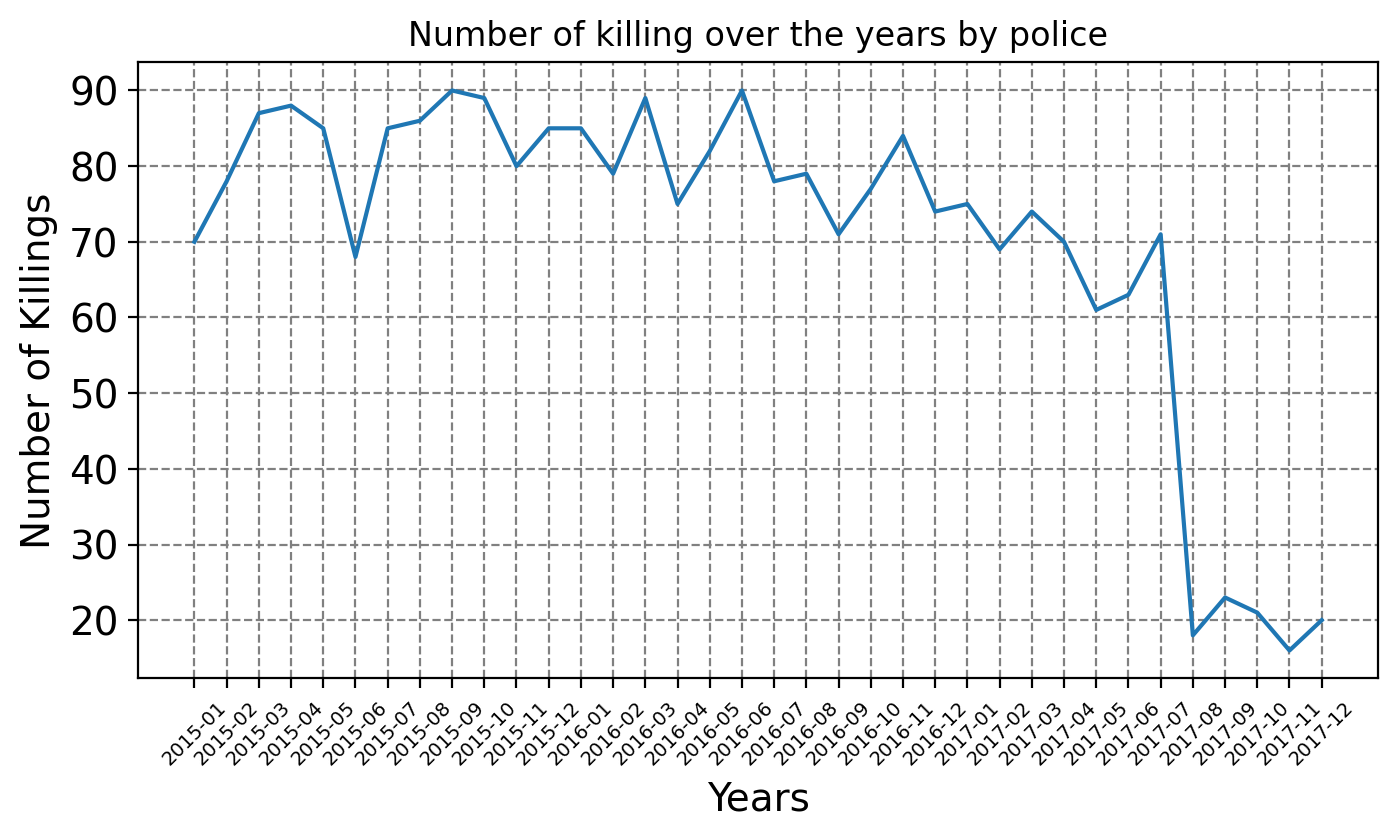

In [48]:

plt.figure(figsize=(8,4), dpi=200)
plt.title('Number of killing over the years by police')
plt.yticks(fontsize=14)
plt.xticks(fontsize=7, rotation=45)

plt.ylabel('Number of Killings', fontsize=14)
plt.xlabel('Years', fontsize=14)

plt.grid(color='grey', linestyle='--')

plt.plot(monthly_killing.Month, monthly_killing['Number of People Killed'])

plt.show()

In [49]:
print('As seen from the  above graph the number of killing go down after 2017 year and half. \nThus it can be seen that the US government addressed the issue wisely.')

As seen from the  above graph the number of killing go down after 2017 year and half. 
Thus it can be seen that the US government addressed the issue wisely.


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [192]:
print('From the above analysis it is seen that specific cities have the share of certain race killed more compared to others \nbut black, white and hispanics are mostly killed by the police.\n')

From the above analysis it is seen that specific cities have the share of certain race killed more compared to others 
but black, white and hispanics are mostly killed by the police.
